In [1]:
# CNN for MNIST
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import tensorflow as tf
import os
import time
import random
import hiddenlayer as hl

In [2]:
dataset = pd.read_csv('train.csv')
dataset_t = pd.read_csv('test.csv')

In [3]:
# A History object to store metrics
history1 = hl.History()

# A Canvas object to draw the metrics
canvas1 = hl.Canvas()


In [4]:
dataset.shape


(42000, 785)

In [5]:
dataset.head(20)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


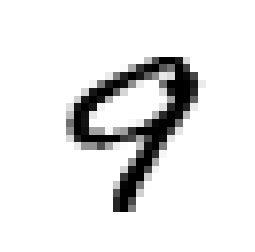

In [6]:
some_digit = dataset.iloc[100,1:]
some_digit_image = some_digit.values.reshape(28,28) # reshape to square
plt.imshow(some_digit_image,cmap = plt.cm.binary,interpolation="nearest")
plt.axis("off")
plt.show()

In [7]:
dataset=pd.get_dummies(dataset,columns=["label"])
dataset.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,label_0,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [8]:
# Seprate X and y
dataset_X = dataset.iloc[:, :-10].values
dataset_y = dataset.iloc[:, -10:].values
dataset_t=dataset_t.values

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
dataset_X = sc.fit_transform(dataset_X)
dataset_t = sc.transform(dataset_t)


#Split trainning and testing case，make sure every digit have equal chance in both testing and trainning set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(dataset_X, dataset_y,
                                                    test_size=0.2,
                                                    stratify=dataset_y)


/home/jun_inthebay/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [9]:
x_train.shape


(33600, 784)

In [14]:
type(x_train)

numpy.ndarray

In [17]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [10]:
y_test.shape


(8400, 10)

In [11]:
#Create g1 Graph
g1 = tf.Graph()
#Set g1 Graph as default graph, and construct it.
with g1.as_default():
    X = tf.placeholder(tf.float32,[None,784]) #for input 
    
    W= tf.Variable(tf.zeros([784,10]))
    b= tf.Variable(tf.zeros([10]))

    #model
    Ylogits=tf.matmul(X,W) + b
    # If you want to assign probabilities to an object being one of several different things,
    #softmax is the thing to do, because softmax gives us a list of values between 0 and 1 that add up to 1. 
    Y = tf.nn.softmax(Ylogits)
    #placeholder for correct labels
    Y_=tf.placeholder(tf.float32,[None,10])

    # loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits,labels=Y_))
    
    #Evaluate the model
    correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    optimizer = tf.train.GradientDescentOptimizer(0.5)#0.5 is 
    train_step = optimizer.minimize(cross_entropy)

In [12]:
def runmodel():
    init = tf.global_variables_initializer()
    sess.run(init)
    
    batch_size=100 # each time how many case input to NN for trainning
    epoch=20 # how many time the NN view the whole data set
    iterations=int(x_train.shape[0]/batch_size)
    
    batchnumber=0
   # mini batch
    for e in range(epoch):
        for i in range(iterations):
            batchnumber= batchnumber+1
            batch_start_idx = (i * batch_size) % (x_train.shape[0] - batch_size)
            batch_end_idx = batch_start_idx + batch_size
            batch_X = x_train[batch_start_idx:batch_end_idx]
            batch_Y = y_train[batch_start_idx:batch_end_idx]
            train_data = {X:batch_X,Y_:batch_Y}
            # train
            sess.run(train_step, feed_dict=train_data)
            
        # Store metrics in the history object
        history1.log(e, loss=cross_entropy, accuracy=accuracy)
        #Plot the two metrics in one graph
        canvas1.draw_plot([history1["loss"], history1["accuracy"]])
        time.sleep(0.1)
        print ("Epoch"+str(e+1))
        print ("batch: "+ str(batchnumber+1))
        ans=sess.run(accuracy,feed_dict={X:x_test,Y_:y_test}) # evaluate the testing dataset.
        print(ans)

ValueError: setting an array element with a sequence.

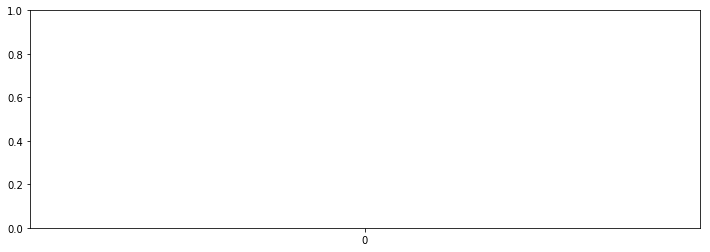

In [13]:
# run the first ANN
with tf.Session( graph = g1) as sess:
    runmodel()

In [ ]:
g2 = tf.Graph()
with g2.as_default():
    X = tf.placeholder(tf.float32,[None,784])
    
    # Hidden 1
    with tf.name_scope('hidden1'):
        weights = tf.Variable(
        tf.truncated_normal([784, 120],
                            stddev=1.0 / math.sqrt(float(784))),name='weights')
        biases = tf.Variable(tf.zeros([120]),
                         name='biases')
        hidden1 = tf.nn.relu(tf.matmul(X, weights) + biases)
    
    # Hidden 2
    with tf.name_scope('hidden2'):
        weights = tf.Variable(
        tf.truncated_normal([120, 32],
                            stddev=1.0 / math.sqrt(float(128))),
        name='weights')
        biases = tf.Variable(tf.zeros([32]),
                         name='biases')
        hidden2 = tf.nn.relu(tf.matmul(hidden1, weights) + biases)
  # Linear    
    with tf.name_scope('softmax_linear'):
        weights = tf.Variable(tf.zeros([32,10]),name='weights')
        biases = tf.Variable(tf.zeros([10]),name='biases')
        Ylogits = tf.matmul(hidden2, weights) + biases
        Y = tf.nn.softmax(Ylogits)
    
    Y_=tf.placeholder(tf.float32,[None,10])

    # loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=Ylogits,labels=Y_))

    correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    optimizer = tf.train.GradientDescentOptimizer(0.005) #learnning rate is key
    train_step = optimizer.minimize(cross_entropy)

In [ ]:
with tf.Session(graph = g2) as sess:
    runmodel()

In [ ]:
# Define training model
g3 = tf.Graph()
with g3.as_default():
    X = tf.placeholder(tf.float32,[None,784])
    X_image = tf.reshape(X,[-1,28,28,1])
    
    # correct answers will go here
    Y_ = tf.placeholder(tf.float32, [None, 10])
    
    K = 32  # first convolutional layer output depth
    L = 64  # second convolutional layer output depth
    N = 1024  # fully connected layer
    
    W1 = tf.Variable(tf.truncated_normal([5, 5, 1, K], stddev=0.1))  # 5x5 patch, 1 input channel, K output channels
    B1 = tf.Variable(tf.ones([K])/10)
    
    W2 = tf.Variable(tf.truncated_normal([5, 5, K, L], stddev=0.1))
    B2 = tf.Variable(tf.ones([L])/10)
    
    W3 = tf.Variable(tf.truncated_normal([7 * 7 * L, N], stddev=0.1))
    B3 = tf.Variable(tf.ones([N])/10)
    
    W4 = tf.Variable(tf.truncated_normal([N, 10], stddev=0.1))
    B4 = tf.Variable(tf.ones([10])/10)
    
    # The model
    
    stride = 1  # output is 28x28*32
    Y1 = tf.nn.relu(tf.nn.conv2d(X_image, W1, strides=[1, stride, stride, 1], padding='SAME') + B1)
    
    #Max pooling, output is 14*14*32
    Y2 = tf.nn.max_pool(Y1,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')
    
    stride = 1  # output is 14x14*64
    Y3 = tf.nn.relu(tf.nn.conv2d(Y2, W2, strides=[1, stride, stride, 1], padding='SAME') + B2)
    
    #Max pooling, output is 7*7*64
    Y4 = tf.nn.max_pool(Y3,ksize=[1,2,2,1],strides=[1,2,2,1], padding='SAME')
    
    # reshape the output from the second Max pooling for the fully connected layer
    YY = tf.reshape(Y4, shape=[-1, 7 * 7 * L])
    
    Y5 = tf.nn.relu(tf.matmul(YY, W3) + B3)
    
    keep_prob = tf.placeholder(tf.float32)
    full1_drop = tf.nn.dropout(Y5, keep_prob=keep_prob)
    
    Ylogits = tf.matmul(full1_drop, W4) + B4
    Y = tf.nn.softmax(Ylogits)
    
     # loss function
    cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits=Ylogits,labels=Y_))

    correct_prediction = tf.equal(tf.argmax(Y,1), tf.argmax(Y_,1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
    
    tf.summary.scalar('digits 5 layer cnn', accuracy)

    # variable learning rate
    lr = tf.placeholder(tf.float32)
    
    optimizer = tf.train.AdamOptimizer(lr)
    train_step = optimizer.minimize(cross_entropy)

In [ ]:
# Start Training and evaluation
with tf.Session( graph = g3) as sess:
    init = tf.global_variables_initializer()
    merged = tf.summary.merge_all()
    sess.run(init)
    
    #start Tensorboard writer to log
    train_writer = tf.summary.FileWriter('./logg/', graph=tf.get_default_graph())
    test_writer = tf.summary.FileWriter('./logg/', graph=tf.get_default_graph())

    batch_size=50 # each time how many case input to NN for trainning
    epoch=10 # how many time the NN view the whole data set
    iterations=int(x_train.shape[0]/batch_size)
    
    batchnumber=0
    
    # learning rate decay
    max_learning_rate = 0.004
    min_learning_rate = 0.0001
    decay_speed = 2000.0
    learning_rate = min_learning_rate + (max_learning_rate - min_learning_rate) * math.exp(-batchnumber/decay_speed)
    
   # mini batch
    for e in range(epoch):
        for i in range(iterations):
            batchnumber= batchnumber+1
            batch_start_idx = (i * batch_size) % (x_train.shape[0] - batch_size)
            batch_end_idx = batch_start_idx + batch_size
            batch_X = x_train[batch_start_idx:batch_end_idx]
            batch_Y = y_train[batch_start_idx:batch_end_idx]
            train_data = {X:batch_X,Y_:batch_Y,keep_prob:0.5,lr:learning_rate} #50% node drop out
            # train
            sess.run(train_step, feed_dict=train_data)
        print ("Epoch"+str(e+1))
        print ("batch: "+ str(batchnumber+1))
        ans=sess.run(accuracy,feed_dict={X:x_test,Y_:y_test,keep_prob:1,lr:learning_rate}) # evaluate the testing dataset.
        print(ans)
        
        
        '''
        summary = sess.run(merged,
                                      {X:batch_X,Y_:batch_Y})
        train_writer.add_summary(summary, e)
        train_writer.flush()
        summary = sess.run(merged,
                                      {X:x_test,Y_:y_test})
        test_writer.add_summary(summary, e)
        test_writer.flush()
        print("tensorboard summary at #{}".format(epoch_i))
        '''
        # Store metrics in the history object
        history1.log(e, loss=cross_entropy, accuracy=accuracy)

        # Plot the two metrics in one graph
        canvas1.draw_plot([history1["loss"], history1["accuracy"]])
        time.sleep(0.1)
    
    
    #Output the result
    results = sess.run(Y,feed_dict={X:dataset_t,keep_prob:1})
       
    # select the indix with the maximum probability
    results = np.argmax(results,axis = 1)

    results = pd.Series(results,name="Label")
    
    submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

    submission.to_csv("cnn_mnist_datagen.csv",index=False)